In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Bike_data=pd.read_csv('day.csv')

In [23]:
Bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [24]:
Bike_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [25]:
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [26]:
Bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [27]:
Bike_data.duplicated().sum()

0

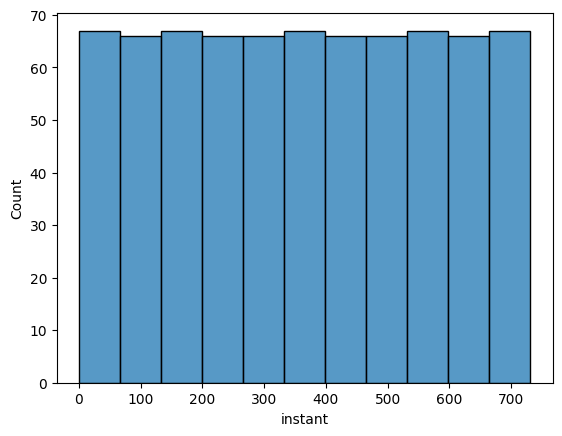

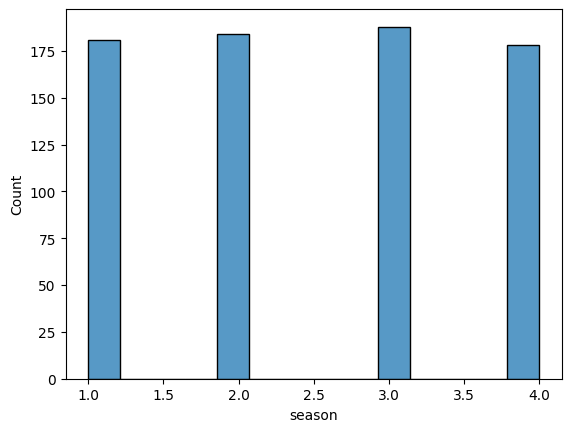

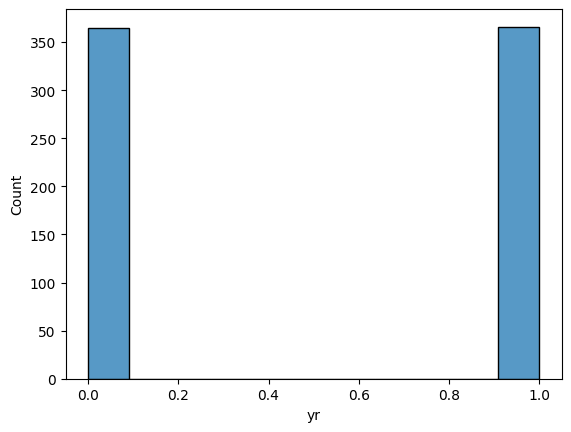

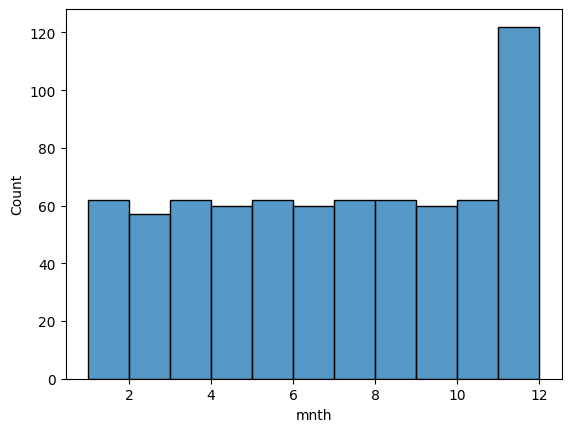

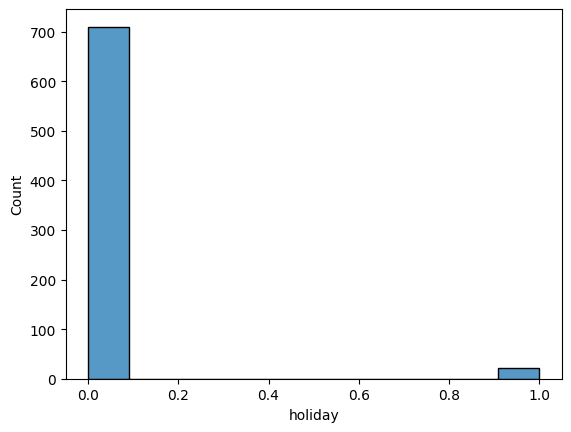

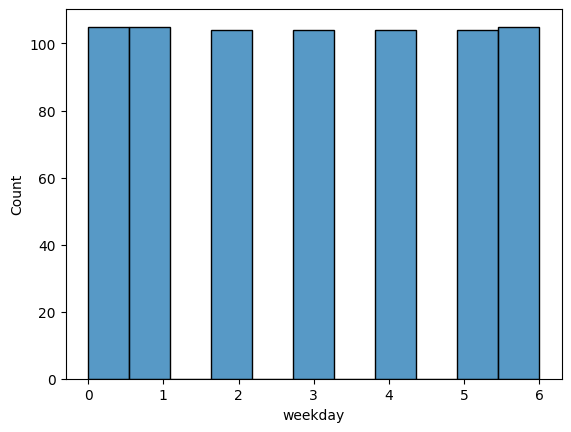

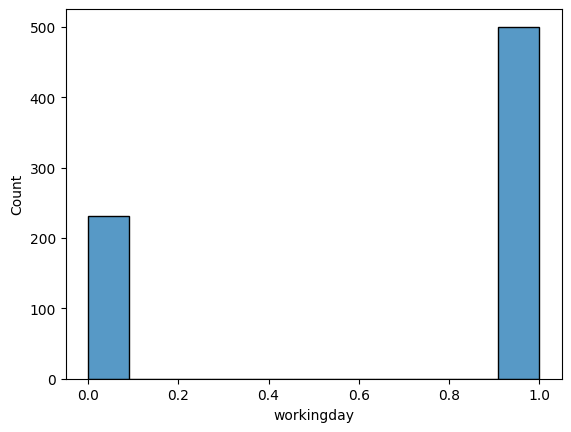

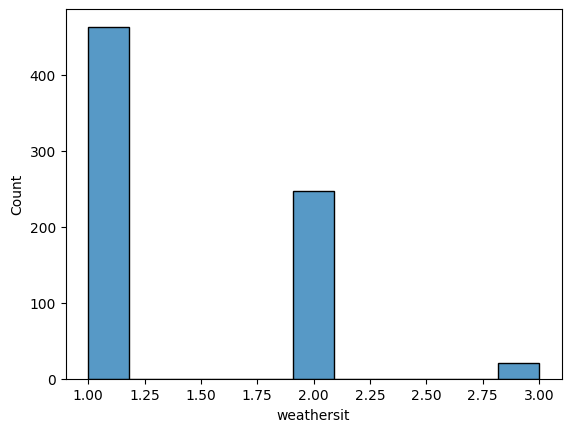

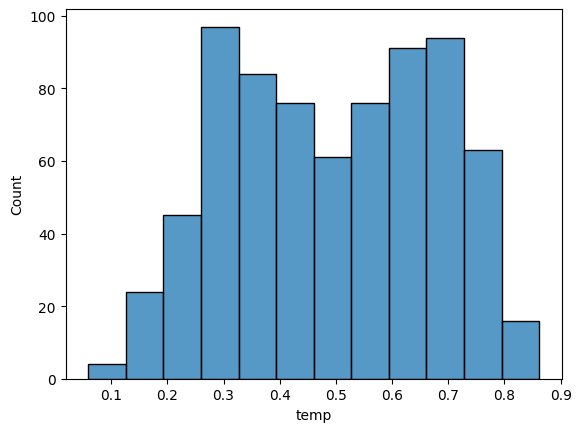

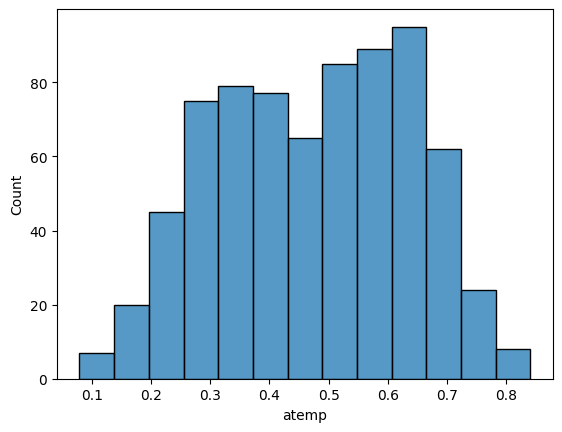

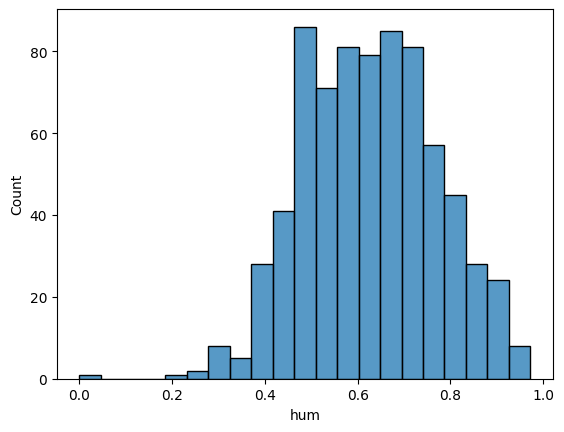

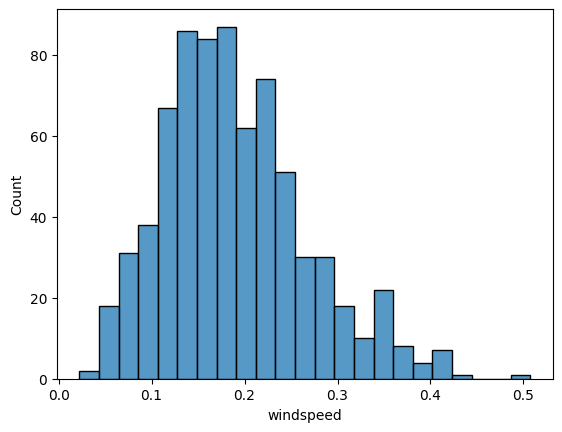

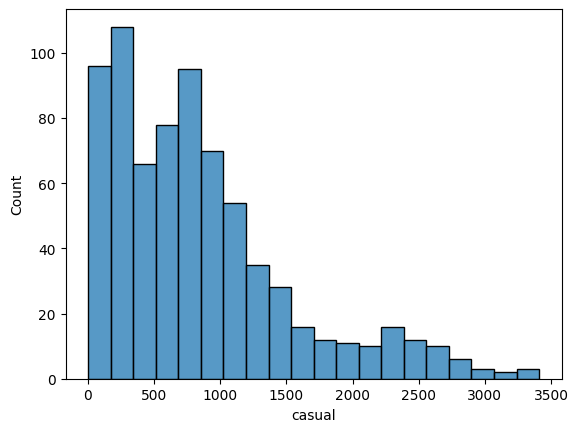

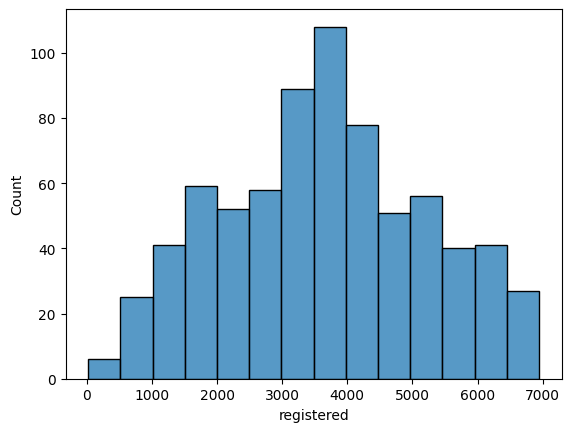

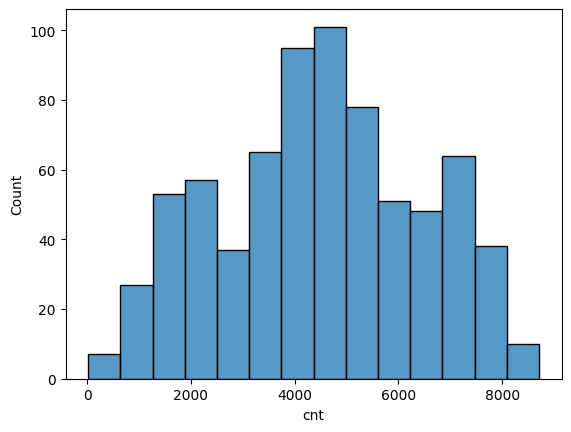

In [28]:
#lets look at the distributions of column with data type int64
# Histogram to understand distributions
import warnings
warnings.filterwarnings("ignore")
for i in Bike_data.select_dtypes(include="number").columns:
    sns.histplot(data=Bike_data,x=i)
    plt.show()

Windspeed and casual seem to be right-skewed  
humidity has a left-skewed shape  
Registered users  and count of total rental bikes seems to follow a somewhat normal distribution

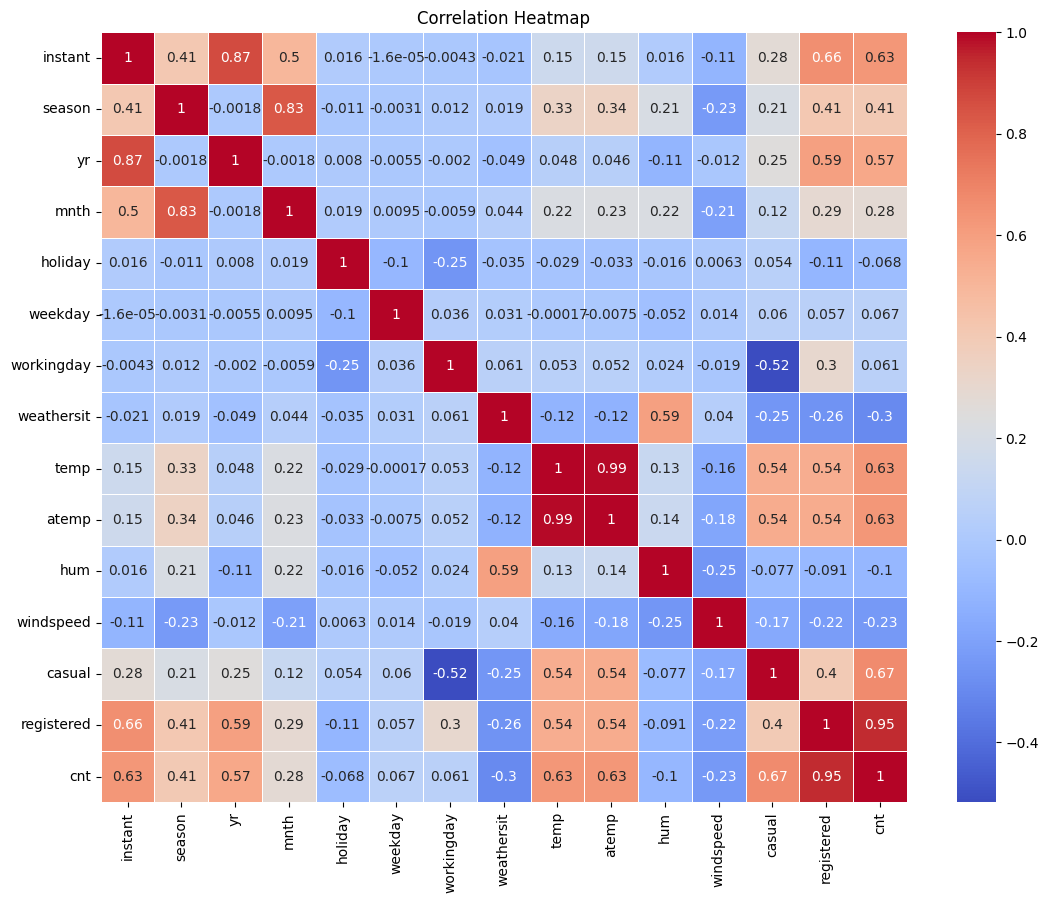

In [30]:
corr = Bike_data.corr(numeric_only=True)
plt.figure(figsize=(13, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

1. Count of total rental bikes (cnt) has strong correlation with instant,year,causal,registered, temp and atemp.   

2. It also has mild correlation to the season.  

3. cnt is a combination of casual and registered, cnt has the most correlation to registered with a value of 0.95,casual and registered may cause collinearity.  

4. High correlation to temperature makes sense. Cold weather makese most people stay indoors. People usually enjoy time in the outdoors during Mild/warm weather.  

5. Temperature and season are related, so season affecting the count of total rental bikes also makes sense.  

6. temp and atemp are more or less the same thing and both have the same correlation with target variable, will remove one to avoid possible collinearity issue.   

  Will take a deeper dive to explore more relationshsips among the data.

<h3> Weathersit vs Total Rental Bikes </h3>

In [34]:
df_test=Bike_data[['weathersit','cnt']]
Weather_v_Cnt=df_test.groupby(['weathersit'], as_index=False)['cnt'].mean()

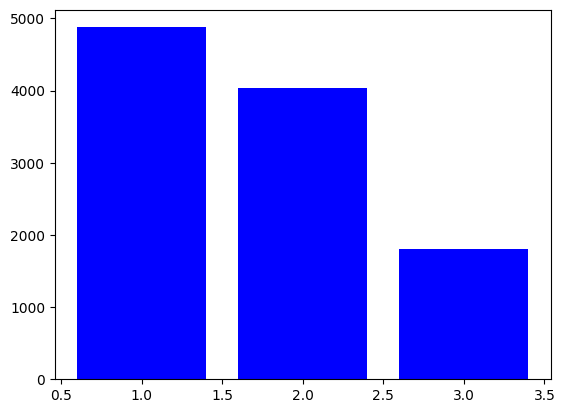

In [39]:
plt.bar(Weather_v_Cnt['weathersit'],Weather_v_Cnt['cnt'], color='blue')
plt.show()

Weatherit values:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  

Based on the graph, we can see that the average total number rented decrease as the weather worsens, with a dramatic decrease in bike count for category 3 of weathersit values.



<h3>Season vs Bike Rental Count</h3>

In [59]:
df_test_2=Bike_data[['season','cnt']]
Season_v_Cnt=df_test_2.groupby(['season'], as_index=False)['cnt'].mean()

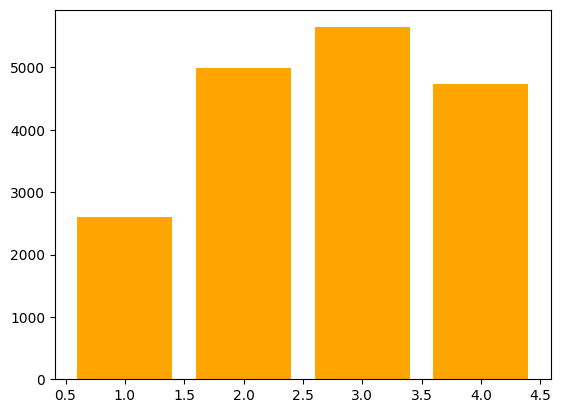

In [62]:
plt.bar(Season_v_Cnt['season'],Season_v_Cnt['cnt'], color='orange')
plt.show()

Season values:
- 1: Winter
- 2: Spring
- 3: Summer
- 4: Fall    

Insights from analysis:  
    Summer has the highest average rental count while winter has the lowest. This further confirms why temperature has a high correlation with  total rental count and why the season also midly affects the rental count.

<h3> Temperature vs Total Bike Rentals</h3>

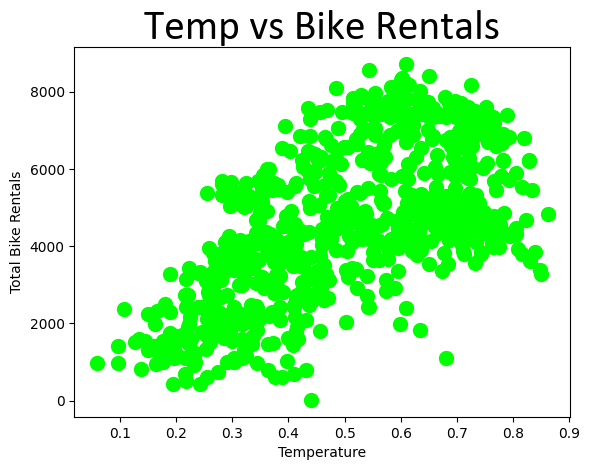

In [67]:
plt.scatter(Bike_data['temp'],Bike_data['cnt'], color="#0f0", marker="o" ,s=100)
plt.title("Temp vs Bike Rentals", fontsize=30, fontname="Calibri") # set title of graph, fontsize is how big the text will be, fontname is type of font
plt.xlabel("Temperature") # set name of x axis
plt.ylabel("Total Bike Rentals") # set name of y axis
plt.show()

Based on the graph, there is a strong relationship between temparature and Bike rentals further backing up the high correlation in the heatmap.

In [77]:
def temp_category(temp):
    if temp < 0.33:
        return 'Cold'
    elif temp < 0.75:
        return 'Warm'
    else:
        return 'Hot'

Bike_data['temp_category'] = Bike_data['temp'].apply(temp_category)


In [78]:
df_test_3=Bike_data[['temp_category','cnt']]
Temp_v_Cnt=df_test_3.groupby(['temp_category'], as_index=False)['cnt'].mean()

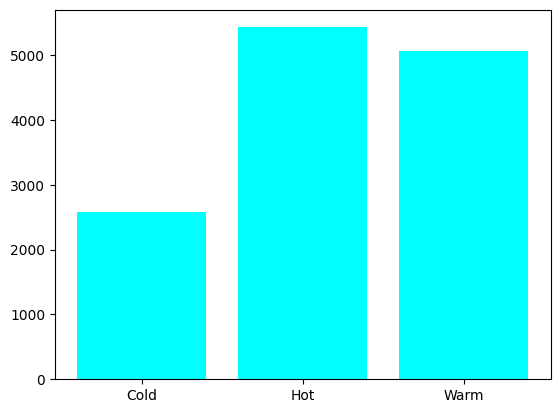

In [79]:
plt.bar(Temp_v_Cnt['temp_category'],Temp_v_Cnt['cnt'], color='cyan')
plt.show()

Hot and warm weather have similar bike rentals with Hot having slightly more.  Cold temperatures have a significant decrease in bike rentals compared to the other categories.

<h3> Year Vs Bike Rentals</h3>

In [80]:
df_test_4=Bike_data[['yr','cnt']]
Year_v_Cnt=df_test_4.groupby(['yr'], as_index=False)['cnt'].mean()

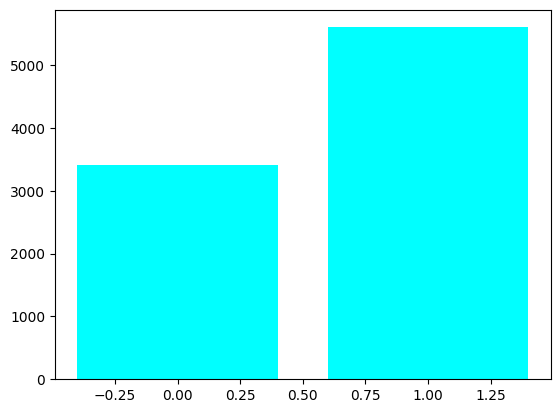

In [91]:
plt.bar(Year_v_Cnt['yr'],Year_v_Cnt['cnt'], color='cyan')
plt.show()

The average rented bikes is substantially higher in 2012 than 2011. Let's dive deeper into each individual year for more insights.

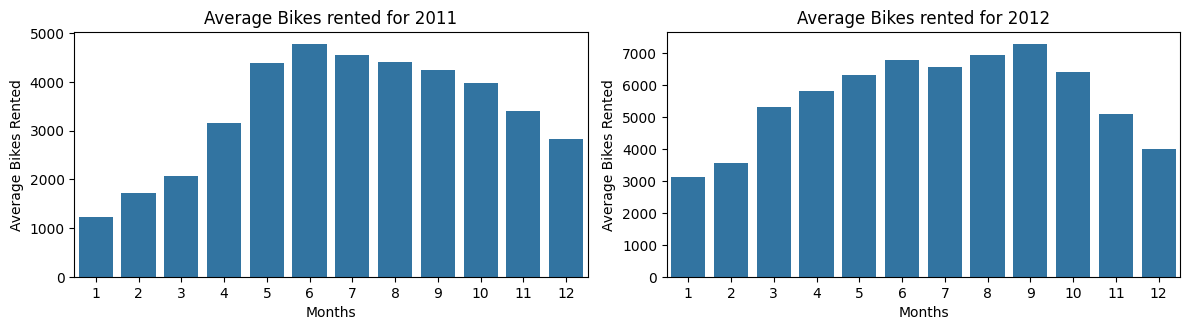

In [89]:
# lets look at each year individually for more insights
Bike_data_2011 = Bike_data[Bike_data['yr'] == 0]
Bike_data_2012 = Bike_data[Bike_data['yr'] == 1]

df_test_4=Bike_data_2011[['mnth','cnt']]
BD_2011_Months=df_test_4.groupby(['mnth'], as_index=False)['cnt'].mean()

df_test_5=Bike_data_2012[['mnth','cnt']]
BD_2012_Months=df_test_5.groupby(['mnth'], as_index=False)['cnt'].mean()

fig=plt.figure(figsize=(12, 6))


#Create different axes for subploting
ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2 ,2 ,2) # add subplot 2 (1 row, 2 columns, second plot). 


    #plt.subplot(1, 2, 1)
sns.barplot(x='mnth', y='cnt', data=BD_2011_Months, ax=ax0)
ax0.set_xlabel('Months')
ax0.set_ylabel('Average Bikes Rented')
ax0.set_title('Average Bikes rented for 2011')
    
    #plt.subplot(1, 2, 2)
sns.barplot(x='mnth', y='cnt', data=BD_2012_Months, ax=ax1)
ax1.set_xlabel('Months')
ax1.set_ylabel('Average Bikes Rented')
ax1.set_title('Average Bikes rented for 2012')
    
plt.tight_layout()
plt.show()

Sales for 2011 peakead in June , while sales for 2012 peaked in September. Also, the average rental count is higher for each month compared to the previous year. This further supports why the total average rental count is significantly more than that of the rental count in 2011.   

Based on research, several factors have contributed to this trend between 2011-2012:

- Users of the system significantly decreased their usage of other modes of transportation such as transits, taxis or their own vehicle.
  - Users reported that the system provided more convenience, more enjoyable and faster commutes and a good way to save money. 
- The network of available stations expanded along with their geographic locations.



<h3> Bike Rentals on Workdays</h3>

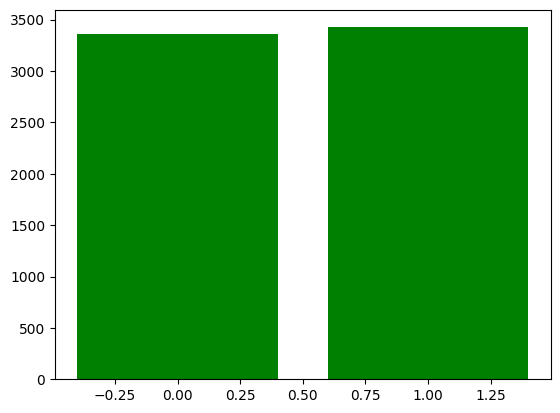

In [94]:
df_test_5=Bike_data_2011[['workingday','cnt']]
Working_Day_Rent_Count=df_test_5.groupby(['workingday'], as_index=False)['cnt'].mean()
plt.bar(Working_Day_Rent_Count['workingday'],Working_Day_Rent_Count['cnt'], color='green')
plt.show()

The rental count is roughly the same and relatively high for both work and non-work days. Based on our previous insights, this result makes sense as memebers report using the system for both fun and convenience.